# Complex models with custom modules in PyTorch

## Table of contents

1. [Understanding custom modules](#understanding-custom-modules)
2. [Setting up the environment](#setting-up-the-environment)
3. [Building custom modules from custom layers](#building-custom-modules-from-custom-layers)
4. [Creating reusable blocks of layers](#creating-reusable-blocks-of-layers)
5. [Combining custom modules into a complex model](#combining-custom-modules-into-a-complex-model)
6. [Implementing custom residual blocks](#implementing-custom-residual-blocks)
7. [Building an encoder-decoder architecture with custom modules](#building-an-encoder-decoder-architecture-with-custom-modules)
8. [Training and evaluating the complex model](#training-and-evaluating-the-complex-model)
9. [Experimenting with different model configurations](#experimenting-with-different-model-configurations)

## Understanding custom modules

In PyTorch, building complex models often requires creating modular and reusable components. Custom modules provide the flexibility to design specialized architectures that go beyond the standard layers provided by PyTorch. Complex models with custom modules allow for breaking down large, sophisticated networks into manageable and reusable parts, facilitating easier debugging, extension, and experimentation.

### **What are custom modules in PyTorch?**

Custom modules in PyTorch are classes that inherit from `torch.nn.Module`, the core building block for all neural networks in PyTorch. These custom modules encapsulate the logic for specific parts of the model, making them reusable, modular, and easy to integrate into more extensive networks.

Complex models often consist of several layers or submodules, each performing a specific function or sequence of operations. By designing custom modules, each component can be defined separately, reused across different parts of the model, and even fine-tuned or modified independently.

### **Why use custom modules in complex models?**

Using custom modules is crucial for several reasons, particularly when building more sophisticated architectures:
- **Modularity**: Custom modules break down complex models into smaller, manageable components that are easier to debug and understand.
- **Reusability**: Once a custom module is defined, it can be reused across different parts of the model or even in entirely different models. This encourages cleaner and more maintainable code.
- **Flexibility**: Custom modules can incorporate non-standard layers, complex operations, or even integrate external components, providing flexibility when designing novel architectures.
- **Readability and scalability**: When models grow large, maintaining clean and readable code becomes challenging. Custom modules help organize the code, making it easier to scale up without sacrificing clarity.

### **The structure of custom modules**

Custom modules are typically defined by subclassing `torch.nn.Module` and consist of two key parts:
- **Initialization (`__init__`)**: This is where the components (such as layers or other submodules) are defined. During initialization, the module sets up its internal state, including the parameters, sub-layers, and constants that it will use.
- **Forward pass (`forward`)**: This method defines the logic for how input data is processed. It takes the input and applies the necessary transformations using the components defined in the `__init__` method. The forward pass contains the actual operations that map inputs to outputs.

### **Building complex models with custom modules**

Complex models are often hierarchical, meaning they are composed of multiple custom modules, each handling a specific part of the network. These modules can range from simple linear layers to more advanced components like convolutional layers, attention mechanisms, or recurrent modules. By combining these modules, a large model is built in a more structured and manageable way.

#### **Submodules within a custom module**

A custom module can itself contain other custom modules (referred to as submodules). This modular approach allows for a layered architecture, where each submodule performs a specific function. The submodules can be combined sequentially or in parallel, depending on the model's requirements.

For example, a complex model might consist of:
- An encoder module that processes the input data.
- A decoder module that generates the output based on the encoded representation.
- Intermediate layers or attention modules that process the data between the encoder and decoder.

#### **Sequential models**

PyTorch provides the `torch.nn.Sequential` class to streamline the process of stacking layers sequentially. This class can be useful when a custom module involves applying multiple layers in a fixed order. However, `nn.Sequential` is limited in that it doesn't support more flexible data flow, such as branching or using different submodules conditionally. For more sophisticated models, custom modules should be defined explicitly to handle non-linear data flows.

#### **Parameter sharing and memory efficiency**

Custom modules allow for parameter sharing, where the same layer or set of parameters is used across multiple parts of the model. This can be useful in architectures like recurrent models or attention-based models where certain transformations are reused multiple times.

By reusing layers or weights, parameter sharing not only reduces the number of learned parameters, but also helps improve memory efficiency during training and inference.

### **Examples of complex models with custom modules**

#### **Example 1: Encoder-decoder architecture**

An encoder-decoder architecture, commonly used in tasks like machine translation or sequence-to-sequence learning, can be implemented using custom modules for both the encoder and decoder.

- **Encoder module**: The encoder processes the input sequence and produces a context or latent representation. It could consist of several stacked layers such as LSTM or GRU units.
- **Decoder module**: The decoder takes the encoded representation and generates the output sequence, often using another LSTM or GRU unit to decode the input.
- **Custom attention module**: Between the encoder and decoder, an attention mechanism may be included to help the model focus on different parts of the input sequence while generating each token in the output sequence.

Each of these components can be implemented as a separate custom module, allowing for flexibility in how they are combined and trained.

#### **Example 2: Residual networks (ResNet)**

Residual networks introduce skip connections, which allow gradients to flow more easily during backpropagation by bypassing one or more layers. This architecture can be implemented using custom modules to define the building blocks of the residual connections.

- A **Residual block** could be implemented as a custom module that adds the input to the output of a series of convolutional layers, making the learning of identity mappings easier.
- These blocks can then be stacked to form deep residual networks, with each block being a reusable component of the architecture.

### **Designing modular networks for experimentation**

Custom modules make it easier to experiment with different architectures by allowing components to be swapped out or modified without changing the entire model. For example, if a certain layer in the model is underperforming, it can be replaced with a more advanced custom module without having to redesign the entire network.

This modularity also allows for rapid prototyping, where different configurations of a model can be tested quickly by assembling them from pre-defined custom modules. Additionally, complex models with custom modules can integrate external modules or specialized components (such as those built in C++ or CUDA), expanding the model’s capabilities.

### **Training and backpropagation in custom modules**

When using custom modules in complex models, PyTorch handles backpropagation automatically. As long as the custom modules use differentiable operations (such as matrix multiplication or activation functions), PyTorch tracks the gradients through the computational graph. During training, the optimizer updates the parameters of each custom module in the same way it does for standard PyTorch layers.

Since custom modules integrate seamlessly with PyTorch’s autograd system, there is no need to manually compute gradients. This ensures that even the most complex models, composed of multiple submodules and custom operations, can be trained efficiently with minimal effort.

### **Advantages of using custom modules in complex models**

Custom modules offer several advantages when building complex models:
- **Code organization**: Custom modules improve code readability and maintainability by breaking down large models into manageable components.
- **Reusability**: Modules can be reused in different models or shared across multiple parts of the same model, reducing redundancy in the codebase.
- **Flexibility**: Custom modules allow for the integration of novel architectures, external components, or unique operations not covered by standard PyTorch layers.
- **Debugging**: Breaking a large model into smaller custom modules makes it easier to debug and isolate issues, especially when experimenting with new architectures.

### **Maths**

#### **Modular representation of complex models**

In neural networks, a model can be mathematically described as a function $ f $ that maps an input $ x $ to an output $ y $ through a sequence of transformations, represented as:

$$
y = f(x) = f_n(f_{n-1}(...f_1(x)))
$$

where each $ f_i $ represents a layer or operation in the network. In the case of complex models with custom modules, each function $ f_i $ can be a custom module that encapsulates a set of transformations, submodules, or learnable parameters.

Custom modules, like standard layers, often define the transformation of an input tensor through a series of operations involving matrix multiplications, non-linear functions, and other operations.

#### **Forward pass through custom modules**

Consider a custom module that represents a linear transformation followed by an activation function. The forward pass for such a custom module can be described mathematically as:

$$
y = f(Wx + b)
$$

where:
- $ W $ is the weight matrix,
- $ x $ is the input tensor,
- $ b $ is the bias vector,
- $ f $ is a non-linear activation function (such as ReLU, sigmoid, or tanh),
- $ y $ is the output.

The custom module applies the linear transformation $ Wx + b $ followed by the activation function, which introduces non-linearity into the model.

#### **Parameter initialization in complex models**

When using custom modules, the parameters (such as weights and biases) are initialized according to specific initialization schemes to ensure that the model starts from a stable point. For example, a common initialization method is **Xavier initialization**, where the weights $ W $ are sampled from a uniform distribution:

$$
W \sim U\left(-\frac{\sqrt{6}}{\sqrt{n_{\text{in}} + n_{\text{out}}}}, \frac{\sqrt{6}}{\sqrt{n_{\text{in}} + n_{\text{out}}}}\right)
$$

where $ n_{\text{in}} $ is the number of input units, and $ n_{\text{out}} $ is the number of output units for that layer.

Alternatively, **He initialization** is used when the activation function is ReLU, and the weights are initialized from a normal distribution:

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}}}\right)
$$

These initialization schemes ensure that the gradients flow properly during backpropagation and prevent issues like vanishing or exploding gradients.

#### **Sequential and parallel operations in complex models**

In complex models, operations may be applied sequentially or in parallel, depending on the architecture. Mathematically, sequential operations can be represented as:

$$
y = f_n(f_{n-1}(...f_1(x)))
$$

This describes a series of transformations applied one after another, where the output of each layer becomes the input to the next.

Parallel operations involve splitting the input $ x $ into multiple branches, applying different transformations in parallel, and then combining the results. For example, if there are two parallel transformations $ f_1 $ and $ f_2 $, the output can be described as:

$$
y = g(f_1(x), f_2(x))
$$

where $ g $ is a function that combines the results, such as element-wise addition or concatenation.

#### **Residual connections in complex models**

In residual networks (ResNet), skip or residual connections are introduced to help gradients flow more easily during backpropagation. The mathematical representation of a residual block is:

$$
y = f(x) + x
$$

Here, $ f(x) $ is a series of transformations (e.g., convolution, batch normalization, and ReLU activation), and the input $ x $ is added directly to the output, forming a shortcut connection. This simple operation helps mitigate the problem of vanishing gradients in deep networks by allowing the model to learn identity mappings.

The gradients in the residual block are computed using the chain rule, and the residual connection ensures that the gradient is not diminished when backpropagated through many layers.

#### **Attention mechanisms in complex models**

In more advanced architectures, such as transformer-based models, custom modules often implement attention mechanisms. The **scaled dot-product attention** is a common component in these models, and it can be described mathematically as:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

where:
- $ Q $ is the query matrix,
- $ K $ is the key matrix,
- $ V $ is the value matrix,
- $ d_k $ is the dimensionality of the key vectors.

The attention mechanism computes the dot product of the query and key matrices, scales it by $ \frac{1}{\sqrt{d_k}} $, and applies a softmax function to generate attention weights. These weights are then multiplied by the value matrix $ V $ to produce the output. Custom modules that implement attention mechanisms allow the model to focus on specific parts of the input data dynamically.

#### **Backpropagation and gradient flow in complex models**

When training complex models with custom modules, PyTorch automatically handles backpropagation by computing gradients through the computational graph. The gradients of the loss function with respect to each parameter are computed using the chain rule.

For a custom module with a transformation $ y = f(Wx + b) $, the gradients with respect to the parameters are:
- Gradient with respect to the weight matrix $ W $:

$$
\frac{\partial L}{\partial W} = \delta \cdot x^T
$$

where $ \delta $ is the gradient of the loss with respect to the output $ y $, and $ x^T $ is the transpose of the input.

- Gradient with respect to the bias $ b $:

$$
\frac{\partial L}{\partial b} = \delta
$$

- Gradient with respect to the input $ x $:

$$
\frac{\partial L}{\partial x} = W^T \cdot \delta
$$

These gradients are then used by the optimizer to update the parameters during training.

#### **Parameter sharing in custom modules**

Parameter sharing in custom modules allows the same set of parameters to be used across multiple layers or operations. This is useful in models where the same transformation is applied repeatedly. Mathematically, parameter sharing can be expressed as:

$$
y_t = f(Wx_t + b)
$$

where the same weight matrix $ W $ and bias $ b $ are applied to different inputs $ x_t $ across multiple time steps or layers.

Parameter sharing reduces the number of learned parameters and ensures consistent transformations across the model, which is particularly useful in architectures like recurrent neural networks (RNNs) or attention-based models.

## Setting up the environment


##### **Q1: How do you install the necessary libraries for building and training complex models with custom modules in PyTorch?**


In [1]:
# !pip install torch torchvision matplotlib

##### **Q2: How do you import the required modules for defining custom modules and training models in PyTorch?**


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math

##### **Q3: How do you configure your environment to use a GPU for training complex models, and how do you fallback to CPU in PyTorch?**

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## Building custom modules from custom layers


##### **Q4: How do you define a custom module by combining multiple custom layers using `torch.nn.Module`?**


In [4]:
class CustomModule(nn.Module):
    def __init__(self):
        super(CustomModule, self).__init__()
        self.layer1 = nn.Linear(784, 256)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

##### **Q5: How do you implement the forward pass for a custom module that integrates both custom and built-in layers in PyTorch?**


In [5]:
class CustomModule(nn.Module):
    def __init__(self):
        super(CustomModule, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.custom_activation = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.custom_activation(x)
        x = self.fc2(x)
        x = self.custom_activation(x)
        x = self.fc3(x)
        return x

##### **Q6: How do you create a custom module that applies a linear transformation followed by a custom activation layer?**


In [6]:
class CustomActivation(nn.Module):
    def forward(self, x):
        return torch.sigmoid(x) * x  # Custom activation function

In [7]:
class LinearCustomActivation(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearCustomActivation, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.activation = CustomActivation()
    
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

##### **Q7: How do you apply a custom module to a simple input tensor to verify its behavior in a standalone setting?**

In [8]:
input_tensor = torch.randn(1, 28*28)
model = LinearCustomActivation(28*28, 10)
output = model(input_tensor)
print(output)

tensor([[ 0.1627,  0.0773,  1.0103, -0.1875, -0.2270,  0.0291,  0.2146,  0.0037,
         -0.2354, -0.1044]], grad_fn=<MulBackward0>)


## Creating reusable blocks of layers


##### **Q8: How do you define a reusable block of layers, such as a convolutional block, by combining multiple layers in a custom module?**


In [9]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.activation(x)
        return x

##### **Q9: How do you implement a custom convolutional block that includes convolution, batch normalization, and activation layers?**


In [10]:
class AdvancedConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=1):
        super(AdvancedConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.activation = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout2d(0.2)  # Added dropout layer
    
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.activation(x)
        x = self.dropout(x)
        return x

##### **Q10: How do you stack multiple instances of a custom block in a larger neural network architecture?**

In [11]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.block1 = ConvBlock(3, 16)
        self.block2 = ConvBlock(16, 32)
        self.block3 = ConvBlock(32, 64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(64 * 4 * 4, 10)
    
    def forward(self, x):
        x = self.pool(self.block1(x))
        x = self.pool(self.block2(x))
        x = self.pool(self.block3(x))
        x = x.view(-1, 64 * 4 * 4)
        x = self.fc(x)
        return x

## Combining custom modules into a complex model


##### **Q11: How do you combine custom modules into a more complex model, such as a multi-layer CNN or a deep feedforward network?**


In [12]:
class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()
        self.conv_blocks = nn.Sequential(
            ConvBlock(3, 32),
            ConvBlock(32, 64),
            ConvBlock(64, 128)
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.conv_blocks(x)
        x = self.pool(x)
        x = x.view(-1, 128)
        x = self.fc(x)
        return x

##### **Q12: How do you implement a forward pass that uses multiple custom modules to process data in a hierarchical fashion?**


In [13]:
class HierarchicalModel(nn.Module):
    def __init__(self):
        super(HierarchicalModel, self).__init__()
        self.block1 = ConvBlock(3, 64)
        self.block2 = ConvBlock(64, 128)
        self.block3 = ConvBlock(128, 256)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Sequential(
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
        )
    
    def forward(self, x):
        x = self.pool(self.block1(x))
        x = self.pool(self.block2(x))
        x = self.pool(self.block3(x))
        x = x.view(-1, 256 * 4 * 4)
        x = self.fc(x)
        return x

##### **Q13: How do you apply dropout between custom modules to prevent overfitting in a complex model?**

In [14]:
class DropoutModel(nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.block1 = ConvBlock(3, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.block2 = ConvBlock(64, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.block1(x)
        x = self.dropout1(x)
        x = self.block2(x)
        x = self.dropout2(x)
        x = self.pool(x)
        x = x.view(-1, 128)
        x = self.fc(x)
        return x

## Implementing custom residual blocks


##### **Q14: How do you implement a custom residual block that includes a skip connection for bypassing the main layer stack?**


In [15]:
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = ConvBlock(channels, channels)
        self.conv2 = ConvBlock(channels, channels)
    
    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.conv2(out)
        out += identity  # Skip connection
        return out

##### **Q15: How do you integrate a residual block into a deeper network by stacking multiple residual blocks?**


In [16]:
class ResNetLikeModel(nn.Module):
    def __init__(self):
        super(ResNetLikeModel, self).__init__()
        self.initial_conv = ConvBlock(3, 64)
        self.residual_blocks = nn.Sequential(
            ResidualBlock(64),
            ResidualBlock(64),
            ResidualBlock(64)
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, 10)
    
    def forward(self, x):
        x = self.initial_conv(x)
        x = self.residual_blocks(x)
        x = self.pool(x)
        x = x.view(-1, 64)
        x = self.fc(x)
        return x

##### **Q16: How do you apply layer normalization or batch normalization inside a custom residual block?**

In [17]:
class ResidualBlockWithLN(nn.Module):
    def __init__(self, channels):
        super(ResidualBlockWithLN, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.ln1 = nn.LayerNorm([channels, 32, 32])
        self.activation = nn.ReLU()
        self.conv2 = nn.Conv2d(channels, channels, kernel_size=3, padding=1)
        self.ln2 = nn.LayerNorm([channels, 32, 32])
    
    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.conv2(out)
        out = self.ln2(out)
        out += identity
        out = self.activation(out)
        return out

## Building an encoder-decoder architecture with custom modules


##### **Q17: How do you define a custom encoder module that compresses input data into a lower-dimensional representation?**


In [18]:
class Encoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(Encoder, self).__init__()
        self.conv = nn.Sequential(
            ConvBlock(3, 64),  # Output: (batch_size, 64, 32, 32)
            nn.MaxPool2d(2, 2),  # Output: (batch_size, 64, 16, 16)
            ConvBlock(64, 128),  # Output: (batch_size, 128, 16, 16)
            nn.MaxPool2d(2, 2),  # Output: (batch_size, 128, 8, 8)
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, latent_dim)
        )
        
    def forward(self, x):
        x = self.conv(x)
        return x

##### **Q18: How do you build a decoder module that reconstructs the original data from the encoder’s representation?**


In [19]:
class Decoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(Decoder, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU()
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # Output: (batch_size, 64, 16, 16)
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),    # Output: (batch_size, 3, 32, 32)
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 8, 8)
        x = self.deconv(x)
        return x

##### **Q19: How do you combine the custom encoder and decoder modules to create a full encoder-decoder architecture in PyTorch?**


In [20]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

##### **Q20: How do you apply the encoder-decoder architecture to a task such as autoencoding or image segmentation?**

In [21]:
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

autoencoder = AutoEncoder(latent_dim=128).to(device)  # Instantiate the model

Files already downloaded and verified


In [22]:
print(autoencoder)

AutoEncoder(
  (encoder): Encoder(
    (conv): Sequential(
      (0): ConvBlock(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): ConvBlock(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Flatten(start_dim=1, end_dim=-1)
      (5): Linear(in_features=8192, out_features=128, bias=True)
    )
  )
  (decoder): Decoder(
    (fc): Sequential(
      (0): Linear(in_features=128, out_features=8192, bias=True)
      (1): ReLU()
    )
    (deconv): Sequential(
      (0): ConvTrans

## Training and evaluating the complex model


##### **Q21: How do you set up a training loop to train a complex model built from custom modules on a dataset like CIFAR-10?**


In [23]:
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 10
loss_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        inputs = inputs.to(device)
        
        optimizer.zero_grad()
        
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader)
    loss_list.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/10], Loss: 0.0148
Epoch [2/10], Loss: 0.0083
Epoch [3/10], Loss: 0.0070
Epoch [4/10], Loss: 0.0063
Epoch [5/10], Loss: 0.0060
Epoch [6/10], Loss: 0.0058
Epoch [7/10], Loss: 0.0055
Epoch [8/10], Loss: 0.0055
Epoch [9/10], Loss: 0.0053
Epoch [10/10], Loss: 0.0053


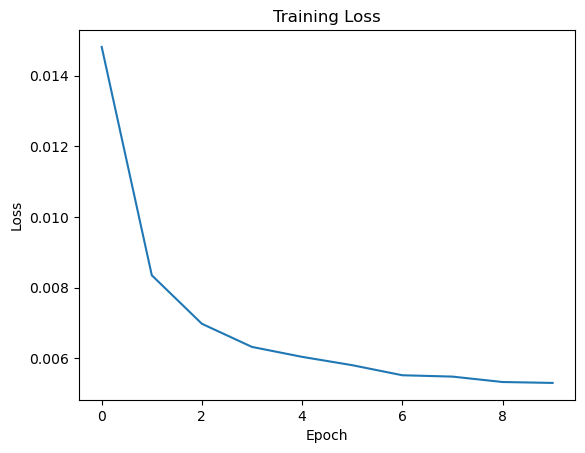

In [24]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

##### **Q22: How do you define the loss function (e.g., CrossEntropyLoss) and optimizer (e.g., Adam) for training the complex model?**


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # For classification tasks

In [27]:
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)  # For reconstruction tasks

##### **Q23: How do you monitor training loss and accuracy during the training process to ensure the model is learning effectively?**


In [29]:
model = CustomCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [30]:
num_epochs = 10
loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    loss_list.append(epoch_loss)
    accuracy_list.append(epoch_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

Epoch [1/10], Loss: 1.2574, Accuracy: 55.06%
Epoch [2/10], Loss: 0.9237, Accuracy: 67.75%
Epoch [3/10], Loss: 0.8076, Accuracy: 71.87%
Epoch [4/10], Loss: 0.7381, Accuracy: 74.28%
Epoch [5/10], Loss: 0.6858, Accuracy: 76.15%
Epoch [6/10], Loss: 0.6421, Accuracy: 77.86%
Epoch [7/10], Loss: 0.6012, Accuracy: 79.17%
Epoch [8/10], Loss: 0.5662, Accuracy: 80.52%
Epoch [9/10], Loss: 0.5364, Accuracy: 81.52%
Epoch [10/10], Loss: 0.5125, Accuracy: 82.24%


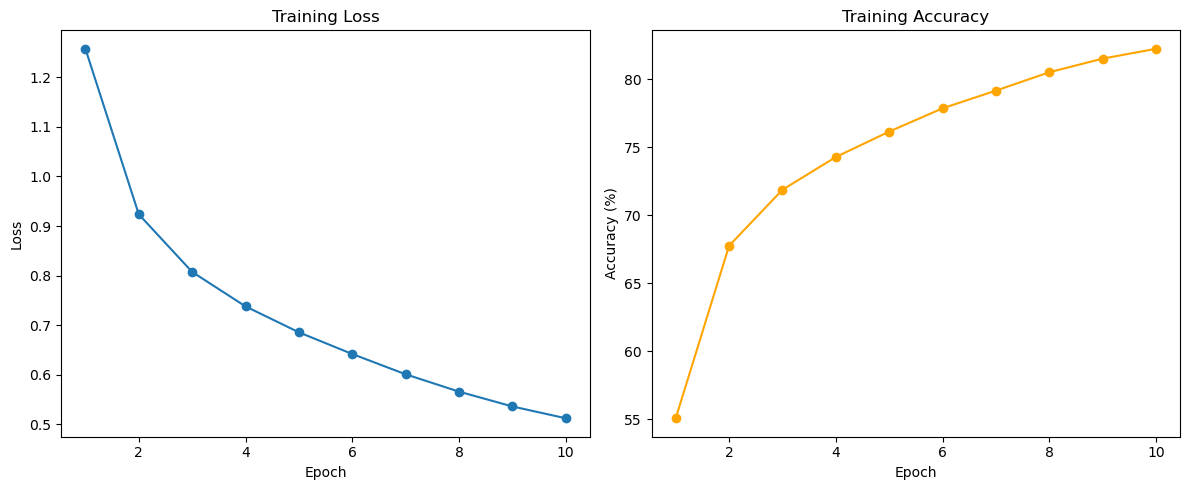

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), loss_list, marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracy_list, marker='o', color='orange')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

##### **Q24: How do you implement early stopping to prevent overfitting when training a complex model with custom modules?**


In [33]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0.001):
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [34]:
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 64
validation_split = 0.1
shuffle_dataset = True
random_seed = 42

dataset_size = len(trainset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          sampler=train_sampler, num_workers=2)
valloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                        sampler=valid_sampler, num_workers=2)

In [35]:
model = CustomCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

early_stopping = EarlyStopping(patience=5, delta=0.001)

In [36]:
num_epochs = 50  # Set a high number of epochs
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    epoch_train_loss = running_loss / len(trainloader)
    epoch_train_acc = 100 * correct / total
    train_loss_list.append(epoch_train_loss)
    train_acc_list.append(epoch_train_acc)
    
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
                
    epoch_val_loss = val_running_loss / len(valloader)
    epoch_val_acc = 100 * val_correct / val_total
    val_loss_list.append(epoch_val_loss)
    val_acc_list.append(epoch_val_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, '
          f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')
    
    # Early stopping:
    early_stopping(epoch_val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered.")
        break

Epoch [1/50], Train Loss: 1.2636, Train Acc: 54.93%, Val Loss: 1.3527, Val Acc: 54.78%
Epoch [2/50], Train Loss: 0.9357, Train Acc: 67.48%, Val Loss: 1.1323, Val Acc: 61.00%
Epoch [3/50], Train Loss: 0.8159, Train Acc: 71.45%, Val Loss: 0.8710, Val Acc: 68.94%
Epoch [4/50], Train Loss: 0.7422, Train Acc: 73.97%, Val Loss: 0.9158, Val Acc: 68.96%
Epoch [5/50], Train Loss: 0.6906, Train Acc: 76.07%, Val Loss: 1.0042, Val Acc: 66.12%
Epoch [6/50], Train Loss: 0.6432, Train Acc: 77.63%, Val Loss: 0.8282, Val Acc: 71.42%
Epoch [7/50], Train Loss: 0.6035, Train Acc: 79.24%, Val Loss: 1.0176, Val Acc: 66.92%
Epoch [8/50], Train Loss: 0.5730, Train Acc: 80.16%, Val Loss: 0.7909, Val Acc: 72.84%
Epoch [9/50], Train Loss: 0.5426, Train Acc: 81.44%, Val Loss: 0.8903, Val Acc: 70.06%
Epoch [10/50], Train Loss: 0.5148, Train Acc: 82.12%, Val Loss: 0.7583, Val Acc: 74.76%
Epoch [11/50], Train Loss: 0.4890, Train Acc: 82.95%, Val Loss: 0.8018, Val Acc: 73.66%
Epoch [12/50], Train Loss: 0.4586, Train 

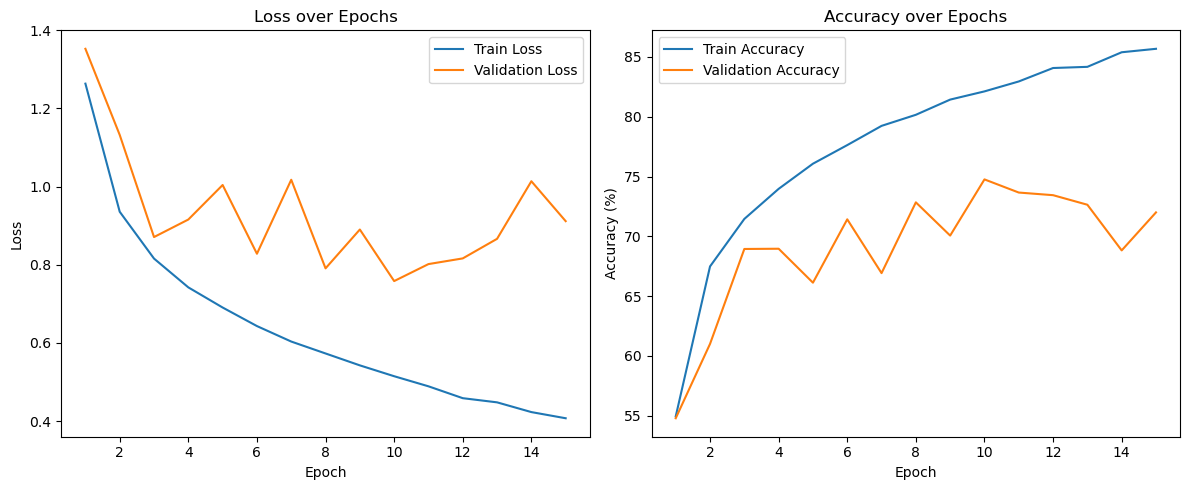

In [37]:
epochs_range = range(1, len(train_loss_list) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, train_loss_list, label='Train Loss')
plt.plot(epochs_range, val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_acc_list, label='Train Accuracy')
plt.plot(epochs_range, val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

##### **Q25: How do you evaluate the complex model on a validation or test set to assess its performance?**

In [38]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [39]:
model.eval()

test_correct = 0
test_total = 0
test_loss = 0.0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_loss /= len(testloader)
test_accuracy = 100 * test_correct / test_total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.9181, Test Accuracy: 71.86%


## Experimenting with different model configurations


##### **Q26: How do you modify the number of layers in the custom modules and observe the impact on model performance?**


In [40]:
class VariableDepthCNN(nn.Module):
    def __init__(self, num_blocks=3):
        super(VariableDepthCNN, self).__init__()
        self.initial_conv = ConvBlock(3, 16)
        
        layers = []
        in_channels = 16
        for _ in range(num_blocks):
            layers.append(ConvBlock(in_channels, in_channels * 2))
            in_channels *= 2
            
        self.conv_blocks = nn.Sequential(*layers)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(in_channels, 10)
        
    def forward(self, x):
        x = self.initial_conv(x)
        x = self.conv_blocks(x)
        x = self.pool(x)
        x = x.view(-1, x.size(1))
        x = self.fc(x)
        return x

In [41]:
num_blocks_list = [2, 4, 6]
results = {}

for num_blocks in num_blocks_list:
    print(f'\nTraining model with {num_blocks} convolutional blocks')
    model = VariableDepthCNN(num_blocks=num_blocks).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=5, delta=0.001)
    
    num_epochs = 20  # Adjust as needed
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        epoch_train_loss = running_loss / len(trainloader)
        epoch_train_acc = 100 * correct / total
        train_loss_list.append(epoch_train_loss)
        train_acc_list.append(epoch_train_acc)
        
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
        epoch_val_loss = val_running_loss / len(valloader)
        epoch_val_acc = 100 * val_correct / val_total
        val_loss_list.append(epoch_val_loss)
        val_acc_list.append(epoch_val_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')
        
        early_stopping(epoch_val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
    
    # Store results;
    results[num_blocks] = {
        'train_loss': train_loss_list,
        'train_acc': train_acc_list,
        'val_loss': val_loss_list,
        'val_acc': val_acc_list
    }


Training model with 2 convolutional blocks
Epoch [1/20], Train Loss: 1.7098, Train Acc: 38.08%, Val Loss: 1.7655, Val Acc: 33.52%
Epoch [2/20], Train Loss: 1.4075, Train Acc: 49.64%, Val Loss: 1.4569, Val Acc: 45.10%
Epoch [3/20], Train Loss: 1.2983, Train Acc: 53.80%, Val Loss: 1.4355, Val Acc: 46.94%
Epoch [4/20], Train Loss: 1.2403, Train Acc: 55.81%, Val Loss: 1.5265, Val Acc: 44.60%
Epoch [5/20], Train Loss: 1.1945, Train Acc: 57.58%, Val Loss: 1.3966, Val Acc: 51.14%
Epoch [6/20], Train Loss: 1.1650, Train Acc: 58.61%, Val Loss: 1.4216, Val Acc: 49.32%
Epoch [7/20], Train Loss: 1.1369, Train Acc: 59.53%, Val Loss: 1.4023, Val Acc: 49.56%
Epoch [8/20], Train Loss: 1.1145, Train Acc: 60.38%, Val Loss: 1.2785, Val Acc: 54.10%
Epoch [9/20], Train Loss: 1.0976, Train Acc: 61.17%, Val Loss: 1.2688, Val Acc: 54.82%
Epoch [10/20], Train Loss: 1.0786, Train Acc: 62.10%, Val Loss: 1.2538, Val Acc: 55.68%
Epoch [11/20], Train Loss: 1.0676, Train Acc: 62.37%, Val Loss: 1.2229, Val Acc: 55.4

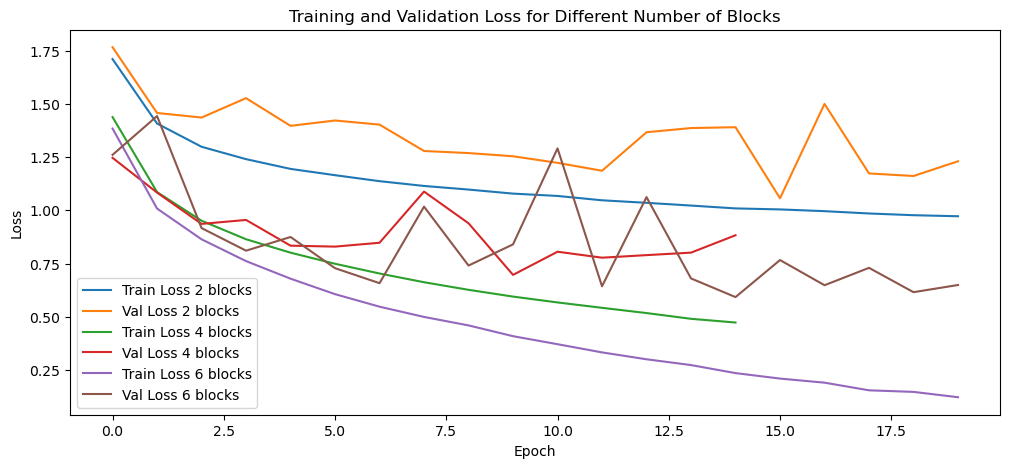

In [42]:
plt.figure(figsize=(12,5))
for num_blocks in num_blocks_list:
    plt.plot(results[num_blocks]['train_loss'], label=f'Train Loss {num_blocks} blocks')
    plt.plot(results[num_blocks]['val_loss'], label=f'Val Loss {num_blocks} blocks')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Number of Blocks')
plt.legend()
plt.show()

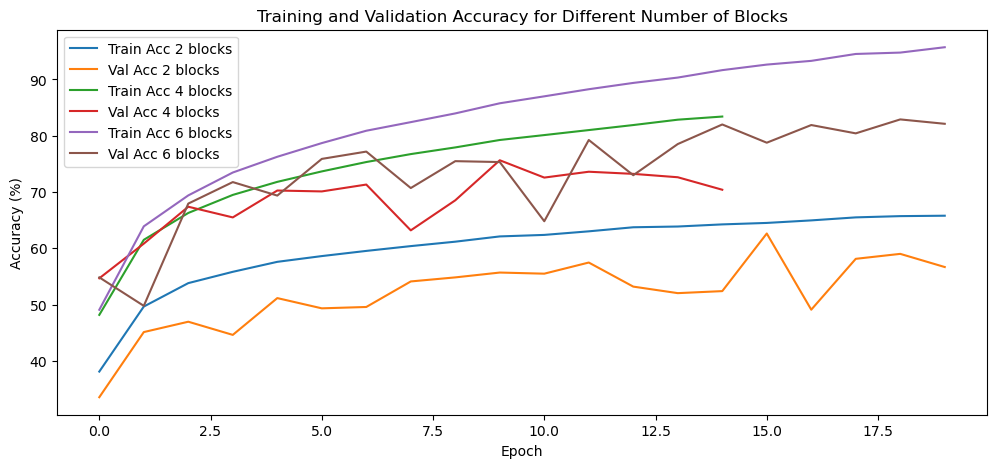

In [43]:
plt.figure(figsize=(12,5))
for num_blocks in num_blocks_list:
    plt.plot(results[num_blocks]['train_acc'], label=f'Train Acc {num_blocks} blocks')
    plt.plot(results[num_blocks]['val_acc'], label=f'Val Acc {num_blocks} blocks')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for Different Number of Blocks')
plt.legend()
plt.show()

##### **Q27: How do you experiment with different activation functions inside custom modules and measure their effect on training speed and accuracy?**


In [44]:
class ConvBlockWithActivation(nn.Module):
    def __init__(self, in_channels, out_channels, activation_fn):
        super(ConvBlockWithActivation, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)
        self.activation = activation_fn
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.activation(x)
        return x

In [45]:
class ActivationExperimentModel(nn.Module):
    def __init__(self, activation_fn):
        super(ActivationExperimentModel, self).__init__()
        self.block1 = ConvBlockWithActivation(3, 16, activation_fn)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.block2 = ConvBlockWithActivation(16, 32, activation_fn)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.block3 = ConvBlockWithActivation(32, 64, activation_fn)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(64 * 4 * 4, 10)
        
    def forward(self, x):
        x = self.pool1(self.block1(x))
        x = self.pool2(self.block2(x))
        x = self.pool3(self.block3(x))
        x = x.view(-1, 64 * 4 * 4)
        x = self.fc(x)
        return x

In [46]:
activation_functions = {
    'ReLU': nn.ReLU(),
    'LeakyReLU': nn.LeakyReLU(0.1),
    'ELU': nn.ELU()
}

In [47]:
results = {}

for name, activation_fn in activation_functions.items():
    print(f'\nTraining with {name} activation function')
    model = ActivationExperimentModel(activation_fn).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=5, delta=0.001)
    
    num_epochs = 20
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        epoch_train_loss = running_loss / len(trainloader)
        epoch_train_acc = 100 * correct / total
        train_loss_list.append(epoch_train_loss)
        train_acc_list.append(epoch_train_acc)
        
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
        epoch_val_loss = val_running_loss / len(valloader)
        epoch_val_acc = 100 * val_correct / val_total
        val_loss_list.append(epoch_val_loss)
        val_acc_list.append(epoch_val_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')
        
        early_stopping(epoch_val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
    
    results[name] = {
        'train_loss': train_loss_list,
        'train_acc': train_acc_list,
        'val_loss': val_loss_list,
        'val_acc': val_acc_list
    }


Training with ReLU activation function
Epoch [1/20], Train Loss: 1.2863, Train Acc: 53.80%, Val Loss: 1.0865, Val Acc: 62.06%
Epoch [2/20], Train Loss: 0.9523, Train Acc: 66.66%, Val Loss: 0.9877, Val Acc: 64.56%
Epoch [3/20], Train Loss: 0.8274, Train Acc: 71.18%, Val Loss: 1.2114, Val Acc: 58.74%
Epoch [4/20], Train Loss: 0.7461, Train Acc: 74.09%, Val Loss: 1.1850, Val Acc: 60.56%
Epoch [5/20], Train Loss: 0.6898, Train Acc: 75.94%, Val Loss: 1.0284, Val Acc: 66.60%
Epoch [6/20], Train Loss: 0.6436, Train Acc: 77.74%, Val Loss: 0.8341, Val Acc: 70.88%
Epoch [7/20], Train Loss: 0.6082, Train Acc: 79.00%, Val Loss: 0.7701, Val Acc: 73.34%
Epoch [8/20], Train Loss: 0.5700, Train Acc: 80.28%, Val Loss: 0.8272, Val Acc: 72.76%
Epoch [9/20], Train Loss: 0.5361, Train Acc: 81.57%, Val Loss: 1.1199, Val Acc: 66.22%
Epoch [10/20], Train Loss: 0.5127, Train Acc: 82.33%, Val Loss: 0.8241, Val Acc: 72.60%
Epoch [11/20], Train Loss: 0.4837, Train Acc: 83.25%, Val Loss: 0.7982, Val Acc: 73.58%
E

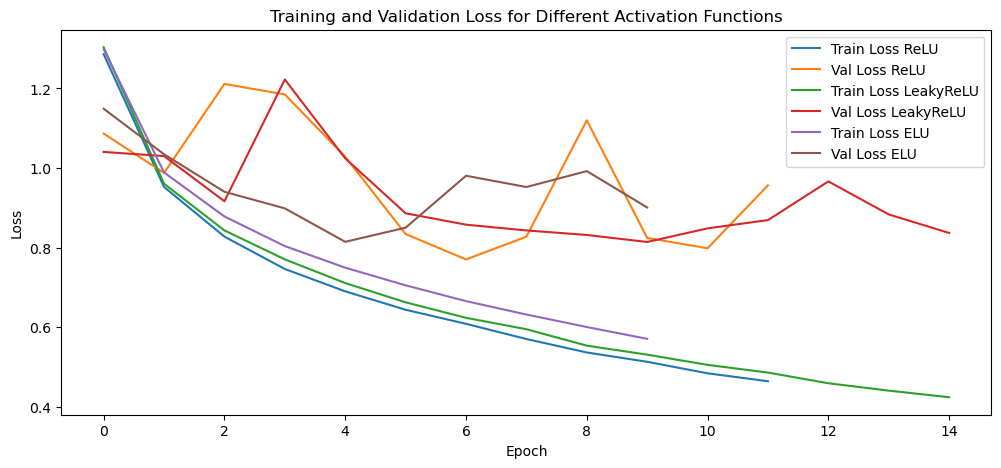

In [48]:
plt.figure(figsize=(12,5))
for name in activation_functions.keys():
    plt.plot(results[name]['train_loss'], label=f'Train Loss {name}')
    plt.plot(results[name]['val_loss'], label=f'Val Loss {name}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Activation Functions')
plt.legend()
plt.show()

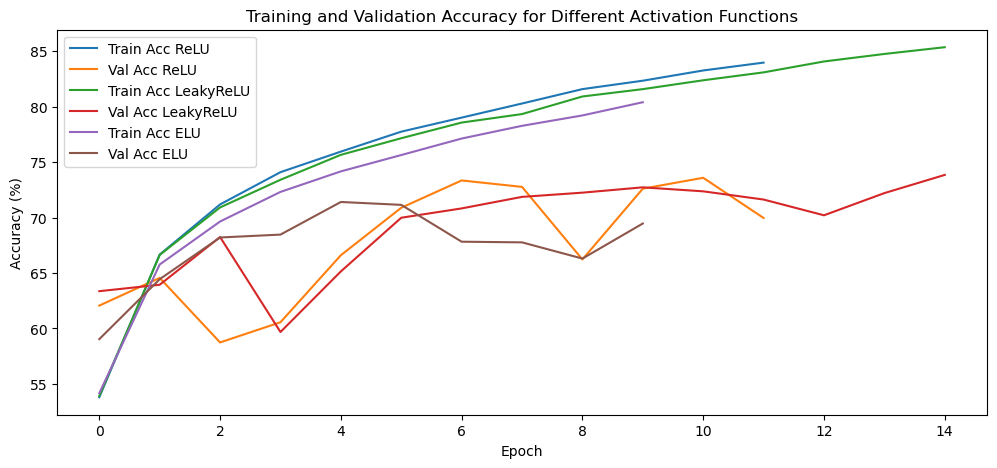

In [49]:
plt.figure(figsize=(12,5))
for name in activation_functions.keys():
    plt.plot(results[name]['train_acc'], label=f'Train Acc {name}')
    plt.plot(results[name]['val_acc'], label=f'Val Acc {name}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for Different Activation Functions')
plt.legend()
plt.show()


##### **Q28: How do you experiment with varying the number of filters or hidden units in the custom convolutional or linear layers?**


In [50]:
class VariableFilterCNN(nn.Module):
    def __init__(self, base_num_filters=16):
        super(VariableFilterCNN, self).__init__()
        self.block1 = ConvBlock(3, base_num_filters)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.block2 = ConvBlock(base_num_filters, base_num_filters * 2)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.block3 = ConvBlock(base_num_filters * 2, base_num_filters * 4)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(base_num_filters * 4 * 4 * 4, 10)
        
    def forward(self, x):
        x = self.pool1(self.block1(x))
        x = self.pool2(self.block2(x))
        x = self.pool3(self.block3(x))
        x = x.view(-1, self.fc.in_features)
        x = self.fc(x)
        return x

In [51]:
filter_sizes = [16, 32, 64]
results = {}

for num_filters in filter_sizes:
    print(f'\nTraining with base number of filters: {num_filters}')
    model = VariableFilterCNN(base_num_filters=num_filters).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=5, delta=0.001)
    
    num_epochs = 20
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        epoch_train_loss = running_loss / len(trainloader)
        epoch_train_acc = 100 * correct / total
        train_loss_list.append(epoch_train_loss)
        train_acc_list.append(epoch_train_acc)
        
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
        epoch_val_loss = val_running_loss / len(valloader)
        epoch_val_acc = 100 * val_correct / val_total
        val_loss_list.append(epoch_val_loss)
        val_acc_list.append(epoch_val_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')
        
        early_stopping(epoch_val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
    
    results[num_filters] = {
        'train_loss': train_loss_list,
        'train_acc': train_acc_list,
        'val_loss': val_loss_list,
        'val_acc': val_acc_list
    }


Training with base number of filters: 16
Epoch [1/20], Train Loss: 1.2923, Train Acc: 53.74%, Val Loss: 1.1436, Val Acc: 58.40%
Epoch [2/20], Train Loss: 0.9619, Train Acc: 66.34%, Val Loss: 0.9633, Val Acc: 65.90%
Epoch [3/20], Train Loss: 0.8440, Train Acc: 70.68%, Val Loss: 0.9527, Val Acc: 68.22%
Epoch [4/20], Train Loss: 0.7689, Train Acc: 73.36%, Val Loss: 0.8602, Val Acc: 69.36%
Epoch [5/20], Train Loss: 0.7121, Train Acc: 75.28%, Val Loss: 0.8652, Val Acc: 69.92%
Epoch [6/20], Train Loss: 0.6533, Train Acc: 77.63%, Val Loss: 0.8328, Val Acc: 72.16%
Epoch [7/20], Train Loss: 0.6158, Train Acc: 78.80%, Val Loss: 0.8158, Val Acc: 72.24%
Epoch [8/20], Train Loss: 0.5778, Train Acc: 79.97%, Val Loss: 0.9290, Val Acc: 69.86%
Epoch [9/20], Train Loss: 0.5497, Train Acc: 80.93%, Val Loss: 0.8963, Val Acc: 70.96%
Epoch [10/20], Train Loss: 0.5181, Train Acc: 81.97%, Val Loss: 0.8372, Val Acc: 72.30%
Epoch [11/20], Train Loss: 0.4963, Train Acc: 82.78%, Val Loss: 0.8683, Val Acc: 71.64%

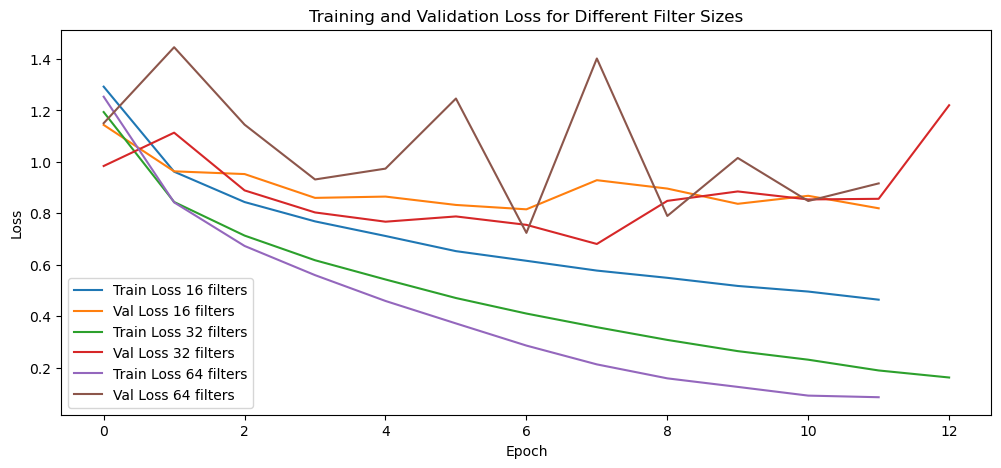

In [52]:
plt.figure(figsize=(12,5))
for num_filters in filter_sizes:
    plt.plot(results[num_filters]['train_loss'], label=f'Train Loss {num_filters} filters')
    plt.plot(results[num_filters]['val_loss'], label=f'Val Loss {num_filters} filters')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Filter Sizes')
plt.legend()
plt.show()

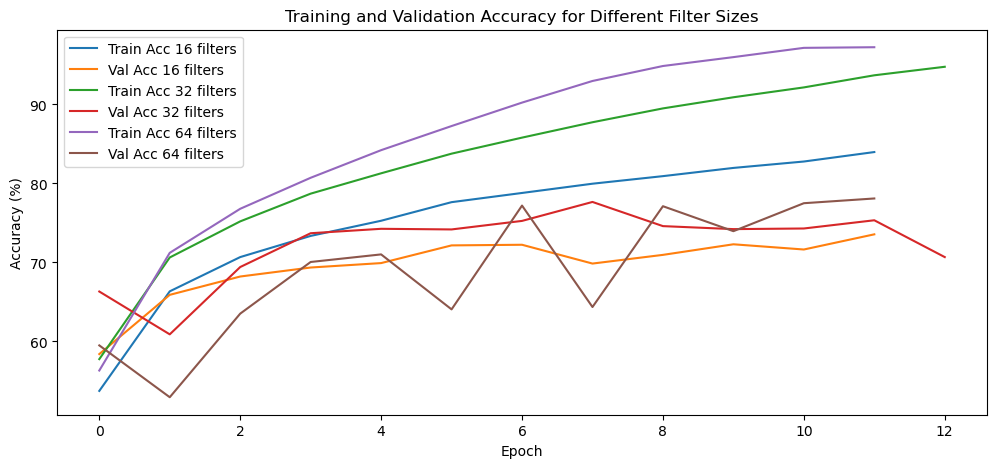

In [53]:
plt.figure(figsize=(12,5))
for num_filters in filter_sizes:
    plt.plot(results[num_filters]['train_acc'], label=f'Train Acc {num_filters} filters')
    plt.plot(results[num_filters]['val_acc'], label=f'Val Acc {num_filters} filters')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for Different Filter Sizes')
plt.legend()
plt.show()

##### **Q29: How do you perform an ablation study to determine the contribution of individual custom modules to the overall performance of the complex model?**


In [58]:
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = ConvBlock(channels, channels)
        self.conv2 = ConvBlock(channels, channels)
        
    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.conv2(out)
        out = out + identity  # Use out-of-place addition
        return out

In [59]:
class AblationModel(nn.Module):
    def __init__(self, use_residual=True):
        super(AblationModel, self).__init__()
        self.initial_conv = ConvBlock(3, 64)
        if use_residual:
            self.blocks = nn.Sequential(
                ResidualBlock(64),
                ResidualBlock(64)
            )
        else:
            self.blocks = nn.Sequential(
                ConvBlock(64, 64),
                ConvBlock(64, 64)
            )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.initial_conv(x)
        x = self.blocks(x)
        x = self.pool(x)
        x = x.view(-1, 64)
        x = self.fc(x)
        return x

In [60]:
use_residual_options = [True, False]
results = {}

for use_residual in use_residual_options:
    status = 'With Residual' if use_residual else 'Without Residual'
    print(f'\nTraining model {status}')
    model = AblationModel(use_residual=use_residual).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=5, delta=0.001)
    
    num_epochs = 20
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        epoch_train_loss = running_loss / len(trainloader)
        epoch_train_acc = 100 * correct / total
        train_loss_list.append(epoch_train_loss)
        train_acc_list.append(epoch_train_acc)
        
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
        epoch_val_loss = val_running_loss / len(valloader)
        epoch_val_acc = 100 * val_correct / val_total
        val_loss_list.append(epoch_val_loss)
        val_acc_list.append(epoch_val_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')
        
        early_stopping(epoch_val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
    
    results[status] = {
        'train_loss': train_loss_list,
        'train_acc': train_acc_list,
        'val_loss': val_loss_list,
        'val_acc': val_acc_list
    }


Training model With Residual
Epoch [1/20], Train Loss: 1.5138, Train Acc: 45.58%, Val Loss: 1.5359, Val Acc: 41.12%
Epoch [2/20], Train Loss: 1.1792, Train Acc: 58.30%, Val Loss: 1.5147, Val Acc: 46.64%
Epoch [3/20], Train Loss: 1.0403, Train Acc: 63.42%, Val Loss: 1.3161, Val Acc: 52.30%
Epoch [4/20], Train Loss: 0.9447, Train Acc: 66.76%, Val Loss: 1.0662, Val Acc: 61.48%
Epoch [5/20], Train Loss: 0.8713, Train Acc: 69.45%, Val Loss: 1.2759, Val Acc: 54.80%
Epoch [6/20], Train Loss: 0.8118, Train Acc: 71.58%, Val Loss: 2.3032, Val Acc: 40.70%
Epoch [7/20], Train Loss: 0.7673, Train Acc: 72.98%, Val Loss: 0.7949, Val Acc: 72.24%
Epoch [8/20], Train Loss: 0.7253, Train Acc: 74.48%, Val Loss: 1.0452, Val Acc: 65.26%
Epoch [9/20], Train Loss: 0.6893, Train Acc: 76.01%, Val Loss: 0.8714, Val Acc: 69.82%
Epoch [10/20], Train Loss: 0.6581, Train Acc: 77.12%, Val Loss: 1.1184, Val Acc: 60.80%
Epoch [11/20], Train Loss: 0.6271, Train Acc: 78.26%, Val Loss: 0.9153, Val Acc: 67.74%
Epoch [12/2

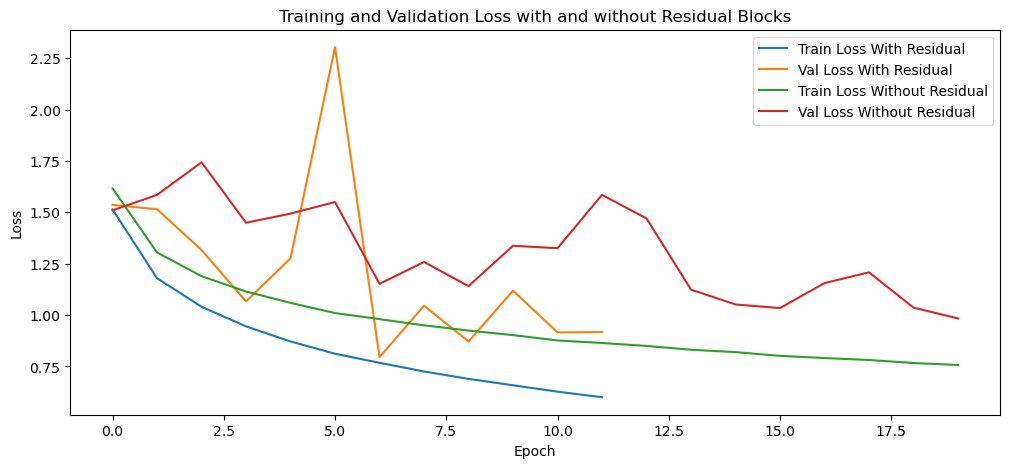

In [61]:
plt.figure(figsize=(12,5))
for status in results.keys():
    plt.plot(results[status]['train_loss'], label=f'Train Loss {status}')
    plt.plot(results[status]['val_loss'], label=f'Val Loss {status}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with and without Residual Blocks')
plt.legend()
plt.show()

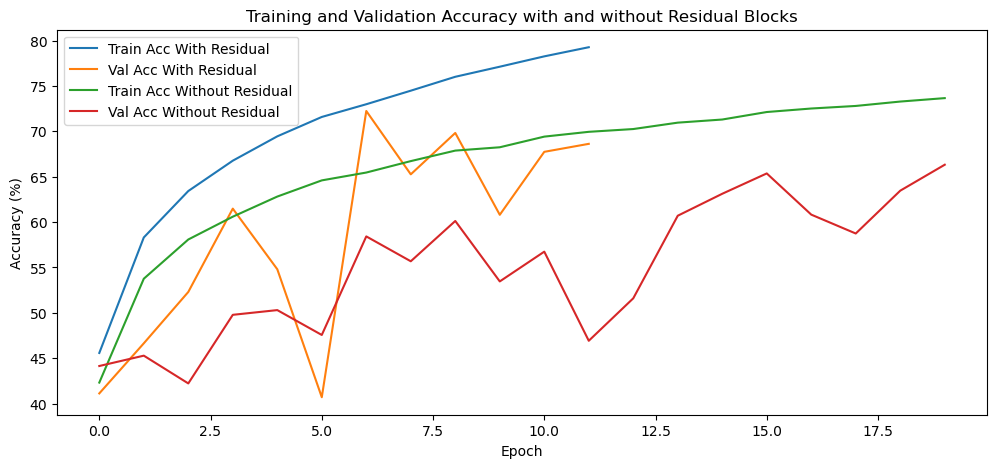

In [62]:
plt.figure(figsize=(12,5))
for status in results.keys():
    plt.plot(results[status]['train_acc'], label=f'Train Acc {status}')
    plt.plot(results[status]['val_acc'], label=f'Val Acc {status}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy with and without Residual Blocks')
plt.legend()
plt.show()

##### **Q30: How do you test different initialization techniques (e.g., Xavier, Kaiming) for weights in custom modules and observe their impact on model convergence?**

In [63]:
import math

def initialize_weights(model, init_method):
    if init_method == 'xavier':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    elif init_method == 'kaiming':
        for m in model.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, a=math.sqrt(5))
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

In [64]:
initializations = ['default', 'xavier', 'kaiming']
results = {}

for init_method in initializations:
    print(f'\nTraining with {init_method.capitalize()} initialization')
    model = CustomCNN().to(device)
    initialize_weights(model, init_method)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=5, delta=0.001)
    
    num_epochs = 20
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        epoch_train_loss = running_loss / len(trainloader)
        epoch_train_acc = 100 * correct / total
        train_loss_list.append(epoch_train_loss)
        train_acc_list.append(epoch_train_acc)
        
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
        epoch_val_loss = val_running_loss / len(valloader)
        epoch_val_acc = 100 * val_correct / val_total
        val_loss_list.append(epoch_val_loss)
        val_acc_list.append(epoch_val_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')
        
        early_stopping(epoch_val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
    
    results[init_method] = {
        'train_loss': train_loss_list,
        'train_acc': train_acc_list,
        'val_loss': val_loss_list,
        'val_acc': val_acc_list
    }


Training with Default initialization
Epoch [1/20], Train Loss: 1.2837, Train Acc: 54.24%, Val Loss: 1.4291, Val Acc: 52.08%
Epoch [2/20], Train Loss: 0.9503, Train Acc: 66.87%, Val Loss: 1.0216, Val Acc: 63.56%
Epoch [3/20], Train Loss: 0.8223, Train Acc: 71.54%, Val Loss: 1.0365, Val Acc: 63.04%
Epoch [4/20], Train Loss: 0.7452, Train Acc: 74.01%, Val Loss: 0.8660, Val Acc: 69.90%
Epoch [5/20], Train Loss: 0.6885, Train Acc: 76.25%, Val Loss: 1.0149, Val Acc: 65.74%
Epoch [6/20], Train Loss: 0.6459, Train Acc: 77.53%, Val Loss: 0.7727, Val Acc: 73.94%
Epoch [7/20], Train Loss: 0.6014, Train Acc: 79.23%, Val Loss: 0.8593, Val Acc: 70.76%
Epoch [8/20], Train Loss: 0.5714, Train Acc: 80.16%, Val Loss: 0.9389, Val Acc: 69.24%
Epoch [9/20], Train Loss: 0.5439, Train Acc: 81.13%, Val Loss: 0.7980, Val Acc: 73.10%
Epoch [10/20], Train Loss: 0.5142, Train Acc: 82.12%, Val Loss: 0.9061, Val Acc: 70.60%
Epoch [11/20], Train Loss: 0.4888, Train Acc: 83.10%, Val Loss: 0.8243, Val Acc: 73.02%
Ear

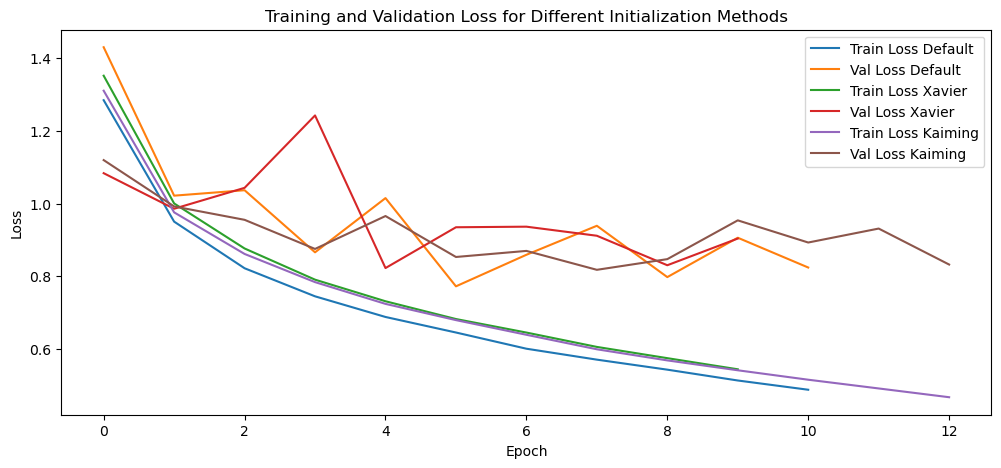

In [65]:
plt.figure(figsize=(12,5))
for init_method in initializations:
    plt.plot(results[init_method]['train_loss'], label=f'Train Loss {init_method.capitalize()}')
    plt.plot(results[init_method]['val_loss'], label=f'Val Loss {init_method.capitalize()}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Initialization Methods')
plt.legend()
plt.show()

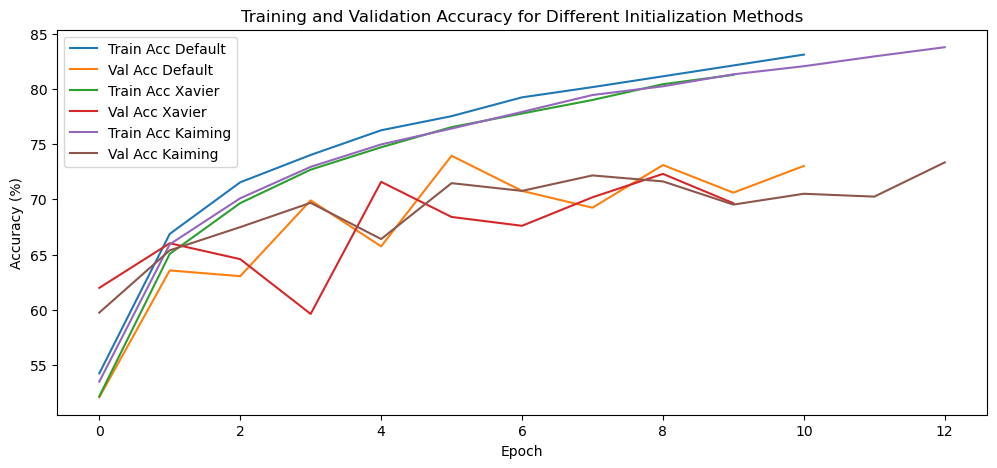

In [66]:
plt.figure(figsize=(12,5))
for init_method in initializations:
    plt.plot(results[init_method]['train_acc'], label=f'Train Acc {init_method.capitalize()}')
    plt.plot(results[init_method]['val_acc'], label=f'Val Acc {init_method.capitalize()}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for Different Initialization Methods')
plt.legend()
plt.show()

In [67]:
import shutil
import os

if os.path.exists('data'):
    shutil.rmtree('data')
    print("Folder 'data' has been deleted.")
else:
    print("Folder 'data' does not exist.")

Folder 'data' has been deleted.
